#Step 1: EDA — head(), describe(), groupby()

In [1]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

df.head()
df.describe()
df.groupby('target').mean()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
target,,,,
0,5.006,3.428,1.462,0.246
1,5.936,2.770,4.260,1.326
2,6.588,2.974,5.552,2.026


In [2]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


#Step 2: Feature Scaling

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled = scaler.fit_transform(df.iloc[:, :-1])
scaled_df = pd.DataFrame(scaled, columns=iris.feature_names)
scaled_df['target'] = df['target']


#Step 3: Train-Test Split & Training KNN

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X = scaled_df.iloc[:, :-1]
y = scaled_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)


KNeighborsClassifier()

#Step 4: Confusion Matrix & Accuracy

In [6]:
from sklearn.metrics import confusion_matrix, accuracy_score

y_pred = knn.predict(X_test)
confusion_matrix(y_test, y_pred)
accuracy_score(y_test, y_pred)


1.0

#Step 5: Classification Report

In [7]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



#Step 6: Compare Error Rate with K Values

In [8]:
error = []

for k in range(1, 21):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    error.append(1 - accuracy_score(y_test, pred))

error


[0.022222222222222254,
 0.022222222222222254,
 0.0,
 0.022222222222222254,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.022222222222222254,
 0.0,
 0.0]

#Step 7: Plot Error Rate vs K

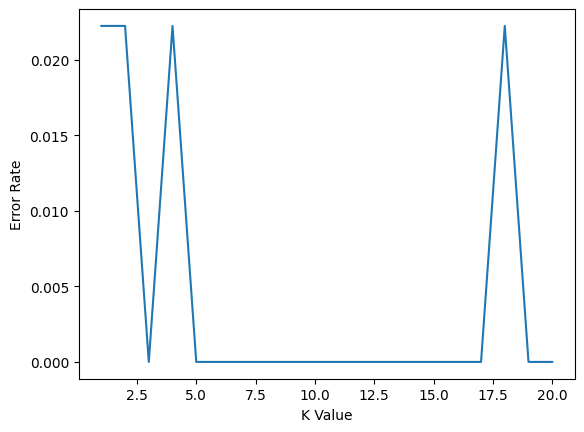

In [9]:
import matplotlib.pyplot as plt

plt.plot(range(1, 21), error)
plt.xlabel("K Value")
plt.ylabel("Error Rate")
plt.show()


#Step 8: Finding Best K

In [10]:
best_k = error.index(min(error)) + 1
best_k


3

#Step 9: Visualize Test Results

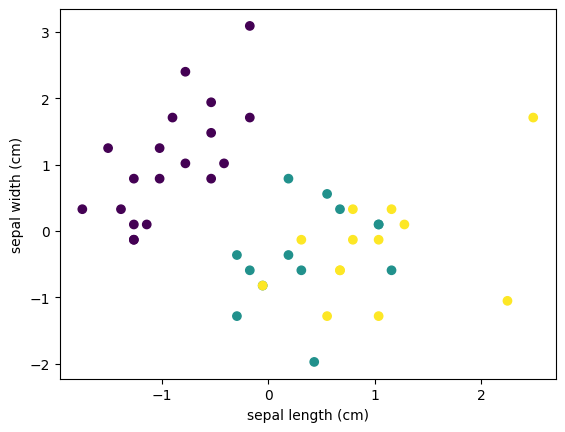

In [11]:
plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_pred)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()
